In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import statsmodels.api as sm

In [9]:
sp500 = pd.read_csv("S&P500.csv")
tele = pd.read_csv("TelcoChurn.csv")

In [10]:
sp500.head()

,Symbol,Name,Sector,Price,52 Week High,52 Week Low,Dividend Yield,Earnings per Share,Sales per Share,Book Value per Share,EBITDA,Market Cap
0,LB,L Brands Inc.,Consumer Discretionary,47.77,63.10,35.00,4.886988,3.98,27.999569,0.034039,2.329000e+09,1.386204e+10
1,PM,Philip Morris International,Consumer Staples,100.39,123.55,96.66,4.328479,4.48,36.406581,0.076128,1.180200e+10,1.540000e+11
2,HRB,Block H&R,Financials,25.19,31.80,19.85,3.729604,1.92,12.477428,0.122633,8.947540e+08,5.381434e+09
3,CL,Colgate-Palmolive,Consumer Staples,68.95,77.91,66.26,2.280177,2.28,17.234325,0.291642,4.064000e+09,6.161664e+10
4,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,86.93,62.85,1.797080,4.07,12.084953,0.359770,2.289000e+09,2.700330e+10


In [11]:
# sp500[sp500['Dividend Yield'] == 0]

In [12]:
# np.log(0)

In [13]:
# sp500['Dividend Yield'].describe()

In [14]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Symbol                505 non-null    object 
 1   Name                  505 non-null    object 
 2   Sector                505 non-null    object 
 3   Price                 505 non-null    float64
 4   52 Week High          505 non-null    float64
 5   52 Week Low           505 non-null    float64
 6   Dividend Yield        505 non-null    float64
 7   Earnings per Share    505 non-null    float64
 8   Sales per Share       505 non-null    float64
 9   Book Value per Share  497 non-null    float64
 10  EBITDA                505 non-null    float64
 11  Market Cap            505 non-null    float64
dtypes: float64(9), object(3)
memory usage: 47.5+ KB


In [15]:
# test = sp500.copy()

In [16]:
# test.isna().sum()

In [17]:
# test['Book Value per Share'] = np.log(test['Book Value per Share'])

In [18]:
# test['Book Value per Share'].hist()

How many unique levels of Sector variable? Which sector has the most companies (using
a bar graph to show)?

In [19]:
a = sp500['Sector'].unique().tolist()

In [20]:
print("There are {} unique sectors in the data".format(sp500['Sector'].nunique()))

There are 11 unique sectors in the data


In [21]:
pd.DataFrame(a)

,0
0,Consumer Discretionary
1,Consumer Staples
2,Financials
3,Information Technology
4,Health Care
5,Energy
6,Industrials
7,Real Estate
8,Utilities
9,Materials


<Axes: >

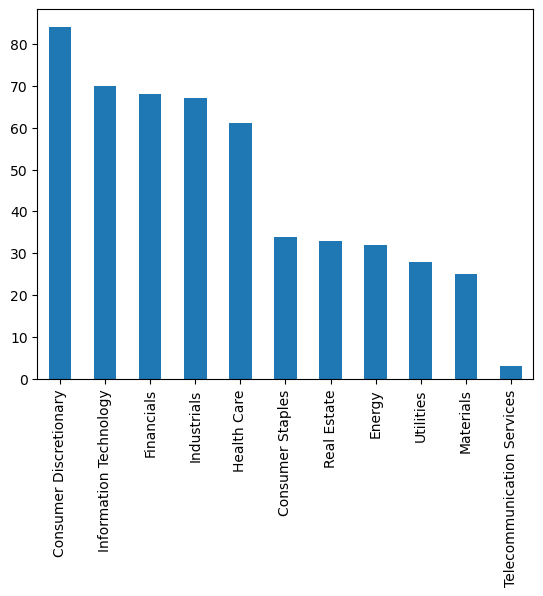

In [22]:
sp500['Sector'].value_counts().plot(kind = 'bar')

In [23]:
sp500['Sector'].value_counts()

Consumer Discretionary        84
Information Technology        70
Financials                    68
Industrials                   67
Health Care                   61
Consumer Staples              34
Real Estate                   33
Energy                        32
Utilities                     28
Materials                     25
Telecommunication Services     3
Name: Sector, dtype: int64

In [24]:
sp500['Sector'].value_counts()[0]

84

In [25]:
# pd.DataFrame(df.groupby('Sector')['Price'].mean())

Explore the relationship between price and earnings per share using scatterplot. Is there
any correlation between the two?

C:\Users\siris\AppData\Local\Temp\ipykernel_40808\3623615032.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sp500.corr())


<Axes: >

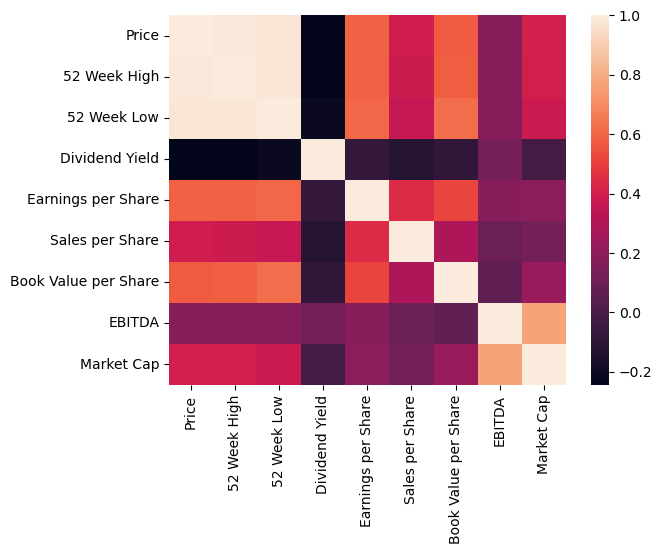

In [26]:
sns.heatmap(sp500.corr())

In [27]:
round(sp500['Price'].corr(sp500['Earnings per Share']),2)

0.59

<Axes: xlabel='Price', ylabel='Earnings per Share'>

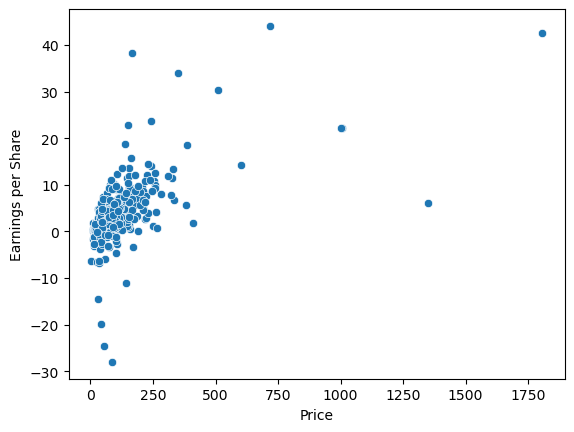

In [28]:
sns.scatterplot(x = sp500['Price'], y = sp500['Earnings per Share'], data = sp500)

Correlation determines the strength of the relationship between two variables and the range of correlation is -1 to +1. Since the correlation between the Price and Earnings per share is 0.59, there is a positive correlation between these two variables. For 

Fit a multiple linear regression model to Price as a function of the logged variables: log
Dividend Yield, log Sales per share, log Book value per share, log Market cap, Earning
per share and Sector

In [29]:
sp500['Dividend Yield'] = np.log(sp500['Dividend Yield'])
sp500['Sales per Share'] = np.log(sp500['Sales per Share'])
sp500['Book Value per Share'] = np.log(sp500['Book Value per Share'])
sp500['Market Cap'] = np.log(sp500['Market Cap'])

C:\Users\siris\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [30]:
sp500.head()

,Symbol,Name,Sector,Price,52 Week High,52 Week Low,Dividend Yield,Earnings per Share,Sales per Share,Book Value per Share,EBITDA,Market Cap
0,LB,L Brands Inc.,Consumer Discretionary,47.77,63.10,35.00,1.586576,3.98,3.332189,-3.380241,2.329000e+09,23.352420
1,PM,Philip Morris International,Consumer Staples,100.39,123.55,96.66,1.465216,4.48,3.594750,-2.575339,1.180200e+10,25.760218
2,HRB,Block H&R,Financials,25.19,31.80,19.85,1.316302,1.92,2.523921,-2.098561,8.947540e+08,22.406221
3,CL,Colgate-Palmolive,Consumer Staples,68.95,77.91,66.26,0.824253,2.28,2.846903,-1.232228,4.064000e+09,24.844198
4,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,86.93,62.85,0.586163,4.07,2.491961,-1.022291,2.289000e+09,24.019225


In [31]:
sp500.describe()

,Price,52 Week High,52 Week Low,Dividend Yield,Earnings per Share,Sales per Share,Book Value per Share,EBITDA,Market Cap
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,497.000000,5.050000e+02,505.000000
mean,103.830634,122.623832,83.536616,-inf,3.753743,3.265131,2.922507,3.590328e+09,23.969472
std,134.427636,155.362140,105.725473,NaN,5.689036,0.972654,1.053429,6.840544e+09,1.011276
min,2.820000,6.590000,2.800000,-inf,-28.010000,0.240183,-3.380241,-5.067000e+09,21.688767
25%,46.250000,56.250000,38.430000,-0.229622,1.490000,2.585654,2.441685,7.739320e+08,23.267390
50%,73.920000,86.680000,62.850000,0.570559,2.890000,3.215534,3.033270,1.614399e+09,23.786701
75%,116.540000,140.130000,96.660000,1.022851,5.140000,3.927199,3.600763,3.692749e+09,24.532584
max,1806.060000,2067.990000,1589.000000,2.538542,44.090000,6.888269,5.564487,7.938600e+10,27.420300


In [32]:
sp500.isna().sum()

Symbol                  0
Name                    0
Sector                  0
Price                   0
52 Week High            0
52 Week Low             0
Dividend Yield          0
Earnings per Share      0
Sales per Share         0
Book Value per Share    8
EBITDA                  0
Market Cap              0
dtype: int64

In [33]:
np.isinf(sp500['Dividend Yield']).values.ravel().sum()

86

In [34]:
sp500.groupby(np.isinf(sp500['Dividend Yield'])).count()

,Symbol,Name,Sector,Price,52 Week High,52 Week Low,Dividend Yield,Earnings per Share,Sales per Share,Book Value per Share,EBITDA,Market Cap
Dividend Yield,,,,,,,,,,,,
False,419,419,419,419,419,419,419,419,419,412,419,419
True,86,86,86,86,86,86,86,86,86,85,86,86


In [35]:
sp500['Dividend Yield'] = sp500['Dividend Yield'].replace([np.inf, -np.inf], np.nan)

In [36]:
sp500.groupby(np.isinf(sp500['Dividend Yield'])).count()

,Symbol,Name,Sector,Price,52 Week High,52 Week Low,Dividend Yield,Earnings per Share,Sales per Share,Book Value per Share,EBITDA,Market Cap
Dividend Yield,,,,,,,,,,,,
False,505,505,505,505,505,505,419,505,505,497,505,505


In [37]:
sp500.isna().sum()

Symbol                   0
Name                     0
Sector                   0
Price                    0
52 Week High             0
52 Week Low              0
Dividend Yield          86
Earnings per Share       0
Sales per Share          0
Book Value per Share     8
EBITDA                   0
Market Cap               0
dtype: int64

In [17]:
# sp500 = sp500.dropna(axis = 0) #null rows are removed : axis = 0

In [41]:
sp500.shape

(505, 12)

In [50]:
sp500['Dividend Yield'] = sp500['Dividend Yield'].fillna(sp500['Dividend Yield'].median())
sp500['Book Value per Share'] = sp500['Book Value per Share'].fillna(sp500['Book Value per Share'].median())

In [51]:
sp500['Dividend Yield'].describe()

count    505.000000
mean       0.627128
std        0.688467
min       -3.888959
25%        0.396505
50%        0.693147
75%        1.022851
max        2.538542
Name: Dividend Yield, dtype: float64

In [52]:
sp500['Book Value per Share'].describe()

count    505.000000
mean       2.924261
std        1.045127
min       -3.380241
25%        2.444906
50%        3.033270
75%        3.597915
max        5.564487
Name: Book Value per Share, dtype: float64

In [61]:
x = sp500[['Dividend Yield','Sales per Share','Book Value per Share','Market Cap','Earnings per Share','Sector']]

In [62]:
x = pd.get_dummies(x, columns = ['Sector'], drop_first = True, dtype = int)

In [63]:
x.isna().sum()

Dividend Yield                       0
Sales per Share                      0
Book Value per Share                 0
Market Cap                           0
Earnings per Share                   0
Sector_Consumer Staples              0
Sector_Energy                        0
Sector_Financials                    0
Sector_Health Care                   0
Sector_Industrials                   0
Sector_Information Technology        0
Sector_Materials                     0
Sector_Real Estate                   0
Sector_Telecommunication Services    0
Sector_Utilities                     0
dtype: int64

In [64]:
# Prepare the variables: dependent, independent and the constant
y = sp500['Price']

X_with_intercept = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, X_with_intercept)
results = model.fit()

In [65]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     26.05
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           4.63e-53
Time:                        14:06:49   Log-Likelihood:                -3042.8
No. Observations:                 505   AIC:                             6118.
Df Residuals:                     489   BIC:                             6185.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              -623.9756    115.589     -5.398      0.000    -851.087    -396.864
Dividend Yield                      -13.5672      7.480     -1.814      0.070     -28.264       1.130
Sales per Share                      24.7279      6.395      3.867      0.000      12.163      37.293
Book Value per Share                 11.6898      5.250      2.226      0.026       1.374      22.006
Market Cap                           24.6699      4.900      5.034      0.000      15.041      34.298
Earnings per Share                   10.7517      0.979     10.986      0.000       8.829      12.675
Sector_Consumer Staples             -37.5961     21.117     -1.780      0.076     -79.087       3.895
Sector_Energy                        12.0599     22.547      0.535      0.593     -32.241      56.361
Sector_Financials                   -41.4288     17.758     -2.333      0.020     -76.320      -6.538
Sector_Health Care                   -7.1600     17.689     -0.405      0.686     -41.915      27.595
Sector_Industrials                  -27.9455     16.801     -1.663      0.097     -60.957       5.066
Sector_Information Technology        14.4629     17.430      0.830      0.407     -19.784      48.710
Sector_Materials                    -28.3141     23.331     -1.214      0.226     -74.156      17.528
Sector_Real Estate                   40.3193     24.194      1.667      0.096      -7.217      87.856
Sector_Telecommunication Services   -90.1927     61.104     -1.476      0.141    -210.251      29.866
Sector_Utilities                    -19.4218     23.678     -0.820      0.412     -65.945      27.101
==============================================================================
Omnibus:                      637.687   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83707.973
Skew:                           6.080   Prob(JB):                         0.00
Kurtosis:                      64.890   Cond. No.                         634.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What is the coefficient of Earnings per share? p-value? Is it significant? How would you
interpret the impact of it on stock price?

Check the dummy variables of Sector. Which is the base case? What is the coefficient of
Sector of Information Technology? p-value? Is it significant? How would you interpret
the impact of companies being in Information Technology Sector on stock prices?

How well does the model fit the data?

Make predictions of stock price.

In [74]:
p_values = results.pvalues.reset_index()

In [75]:
p_values

,index,0
0,const,1.051418e-07
1,Dividend Yield,7.032436e-02
2,Sales per Share,1.251860e-04
3,Book Value per Share,2.643727e-02
4,Market Cap,6.756290e-07
5,Earnings per Share,3.035162e-25
6,Sector_Consumer Staples,7.563483e-02
7,Sector_Energy,5.929793e-01
8,Sector_Financials,2.005302e-02
9,Sector_Health Care,6.858150e-01


In [77]:
p_values.columns = ['Variables','P-Value']

In [78]:
p_values

,Variables,P-Value
0,const,1.051418e-07
1,Dividend Yield,7.032436e-02
2,Sales per Share,1.251860e-04
3,Book Value per Share,2.643727e-02
4,Market Cap,6.756290e-07
5,Earnings per Share,3.035162e-25
6,Sector_Consumer Staples,7.563483e-02
7,Sector_Energy,5.929793e-01
8,Sector_Financials,2.005302e-02
9,Sector_Health Care,6.858150e-01


In [80]:
significant_variables = p_values[p_values['P-Value'] < 0.05]['Variables'].tolist() #checking the p_value with significance level=0.05 

In [81]:
significant_variables

['const',
 'Sales per Share',
 'Book Value per Share',
 'Market Cap',
 'Earnings per Share',
 'Sector_Financials']

In [82]:
significant_variables = significant_variables[1:]

In [83]:
significant_variables

['Sales per Share',
 'Book Value per Share',
 'Market Cap',
 'Earnings per Share',
 'Sector_Financials']

In [84]:
insignificant_variables = p_values[p_values['P-Value'] > 0.05]['Variables'].tolist() #checking the p_value with significance level=0.05 

In [85]:
insignificant_variables

['Dividend Yield',
 'Sector_Consumer Staples',
 'Sector_Energy',
 'Sector_Health Care',
 'Sector_Industrials',
 'Sector_Information Technology',
 'Sector_Materials',
 'Sector_Real Estate',
 'Sector_Telecommunication Services',
 'Sector_Utilities']

In [86]:
price_pred = results.predict(X_with_intercept)

In [87]:
price_pred

0       16.276259
1       61.004377
2      -71.980930
3       20.656702
4       54.053700
          ...    
500     -1.559209
501     64.776087
502    127.327805
503    141.439720
504    224.683954
Length: 505, dtype: float64

In [88]:
# Join it with the original dataset
sp500['price predicted'] = price_pred

In [89]:
sp500.head()

,Symbol,Name,Sector,Price,52 Week High,52 Week Low,Dividend Yield,Earnings per Share,Sales per Share,Book Value per Share,EBITDA,Market Cap,price predicted
0,LB,L Brands Inc.,Consumer Discretionary,47.77,63.10,35.00,1.586576,3.98,3.332189,-3.380241,2.329000e+09,23.352420,16.276259
1,PM,Philip Morris International,Consumer Staples,100.39,123.55,96.66,1.465216,4.48,3.594750,-2.575339,1.180200e+10,25.760218,61.004377
2,HRB,Block H&R,Financials,25.19,31.80,19.85,1.316302,1.92,2.523921,-2.098561,8.947540e+08,22.406221,-71.980930
3,CL,Colgate-Palmolive,Consumer Staples,68.95,77.91,66.26,0.824253,2.28,2.846903,-1.232228,4.064000e+09,24.844198,20.656702
4,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,86.93,62.85,0.586163,4.07,2.491961,-1.022291,2.289000e+09,24.019225,54.053700
